### Imports Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


In [3]:
path_to_cleaned_data = "amazon-books-cleaned-data/cleaned.csv"
df = pd.read_csv(path_to_cleaned_data)
df

,title,description,authors,publisher,published_date,categories,ratings_count,id,price,user_id,profile_name,review_helpfulness,review_score,review_time,review_summary,review_text
0,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996-01-01T00:00:00Z,['Religion'],5,0802841899,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...
1,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996-01-01T00:00:00Z,['Religion'],5,0802841899,25.97,A36TPZSH8LBT1,haskell,2/3,5,1311465600,Early Christian development of the Church,Everett Ferguson approaches the subject of ear...
2,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996-01-01T00:00:00Z,['Religion'],5,0802841899,25.97,ANX3DDV12ZRRU,GodsBreath.wordpress,2/3,4,1289952000,An Excellent Presentation of the Beliefs of th...,This book is a continual resource. It is so bi...
3,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996-01-01T00:00:00Z,['Religion'],5,0802841899,25.97,A2H2LORTA5EZY2,Edward E. Howe,3/5,4,1266192000,Christ is Lord,This is a very useful and thorough text book. ...
4,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,1988-01-01T00:00:00Z,NaN,3,B000JINSBG,NaN,A15A5KPP3AL76U,Vinny Wolf,0/0,5,1361491200,meaty and fast,"This play was excellent. It's very smart, inte..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639093,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],Scholastic Paperbacks,2000-06-01T00:00:00Z,['Juvenile Fiction'],2,0590482467,3.32,NaN,NaN,3/4,5,900028800,Best Book I have Ever Read,"Dominic, a Lonely, boy, who just wants to have..."
1639094,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],Vintage,2003-08-12T00:00:00Z,['Fiction'],19,1402508735,34.99,A27UK6LI19NDNO,"maryzeus ""maryzzz""",0/0,1,1129420800,very fractured,After reading 50 pages and restarting every so...
1639095,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],Vintage,2003-08-12T00:00:00Z,['Fiction'],19,1402508735,34.99,A3N4CDTH72ZVDS,Matko Vladanovic,0/0,4,1098403200,The quest for the holy Grail,What is wrong or good with this book. What are...
1639096,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],Vintage,2003-08-12T00:00:00Z,['Fiction'],19,1402508735,34.99,A16IDI50I9SR5V,"""tyuro""",0/1,3,1036972800,Looking For Spirituality in All The Wrong Places,Zadie Smith's latest is a subpar Coupland-ish ...


In [50]:
df2 = df[['title','review_score','price']]
df4 = df2.groupby(['title'], as_index=False).agg('mean')
df4["title_num_words"] = df4['title'].str.split().str.len()
df4['contains_subheading'] = df4['title'].str.contains(":",regex=False).astype(int)
df4_sorted = df4.sort_values(by=['review_score'])
df4_sorted


,title,review_score,price,title_num_words,contains_subheading
27449,Praise & Worship Collection Mb,1.0,NaN,5,0
42413,The Tao of Silence,1.0,8.95,4,0
42412,The Tao of Real Estate: Investing with Confidence,1.0,27.95,8,1
16817,How It Worked: The Story of Clarence H. Snyder...,1.0,NaN,13,1
1896,"A system of logic, ratiocinative and inductive...",1.0,NaN,22,1
...,...,...,...,...,...
19292,Just Past Oysterville: Shoalwater Book One,5.0,NaN,6,1
19290,Just One Night,5.0,13.50,3,0
19287,Just My Luck (Movie Novelization),5.0,NaN,5,0
19255,Junior High and Middle School TalkSheets Psalm...,5.0,11.24,9,0


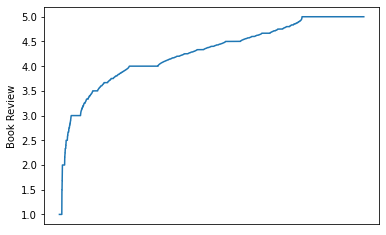

In [51]:
x = df4_sorted['title']
y = df4_sorted['review_score']
plt.plot(x,y)
plt.gca().axes.get_xaxis().set_visible(False)
plt.ylabel('Book Review')

plt.show()

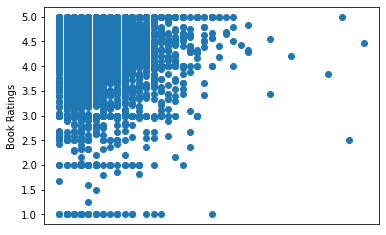

In [52]:
df5 = df4.sample(n=5000)
y = df5['review_score']
x = df5['title_num_words']
plt.scatter(x,y)
plt.gca().axes.get_xaxis().set_visible(False)
plt.ylabel('Book Ratings')

plt.show()

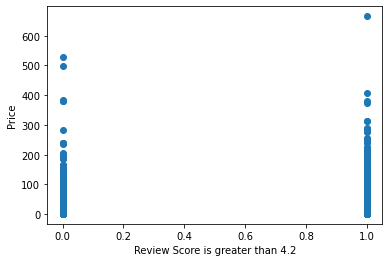

In [56]:
df4_sorted['greater_than_4.2'] = df4_sorted['review_score'] > 4.2

x = df4_sorted['greater_than_4.2']
y = df4_sorted['price']
plt.scatter(x,y)
plt.ylabel("Price")
plt.xlabel("Review Score is greater than 4.2")

plt.show()

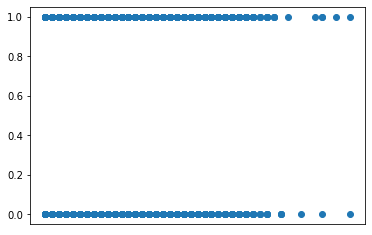

In [57]:
y = df4_sorted['greater_than_4.2']
x = df4_sorted['title_num_words']
plt.scatter(x,y)
plt.gca().axes.get_xaxis().set_visible(False)

plt.show()

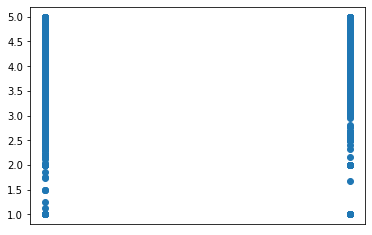

In [61]:
df5 = df4_sorted.sample(n=5000)
x = df5['contains_subheading']
y = df5['review_score']
plt.scatter(x,y)
plt.gca().axes.get_xaxis().set_visible(False)

plt.show()